In [1]:

import ipywidgets as widgets
con = widgets.Controller()
display(con)

Controller()

In [1]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets
import serial

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
my_chain = ikpy.chain.Chain.from_urdf_file("xarm.urdf",active_links_mask=[False, True, True, True, True, True])

In [29]:
target_position = [ 0, 0.0,0.3]

target_orientation = [1, 1, 0]

In [30]:
ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))


The angles of each joints are :  [0.0, -26.668325485851234, 18.083385696529003, -39.20596534180904, 21.122579720018745, -18.3323810757901]


In [31]:
computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

Computed position: [7.51081045e-09 1.49541737e-08 3.00000239e-01], original position : [0, 0.0, 0.3]
Computed position (readable) : ['0.00', '0.00', '0.30']


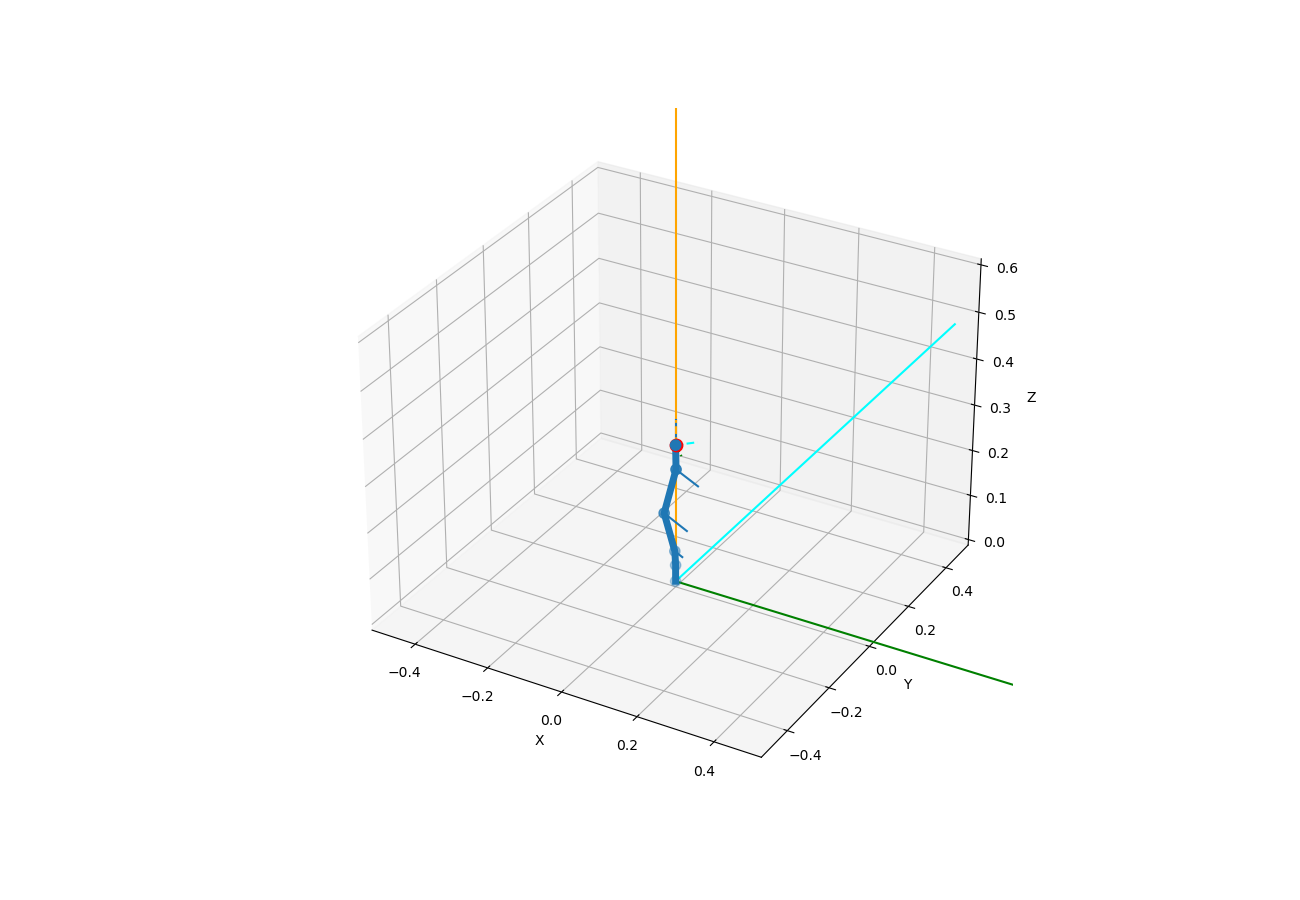

In [32]:
%matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()